In [1]:
# import xenaPython as xena
from statistics import median, mean
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.impute import SimpleImputer 
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedBaggingClassifier, RUSBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import joblib
from scipy.stats import f_oneway
import seaborn as sns

from scipy.stats import ttest_ind
from collections import Counter
from time import time
import multiprocessing
from sklearn.metrics import confusion_matrix

In [ ]:
# def handling_missing_values(d, stages, data, samples):
#   l=[]
#   for i in range(len(stages)):
#     if stages[i]=='NaN' or stages[i]==0:
#       l.append(i)
#     else:
      
#       stages[i]=d[str(stages[i])]
#       #pass
#   l = set(l)
#   stagetemp = []
#   datatemp = []
#   samplestemp = []

#   print("Without Removing=", Counter(stages))
#   for i in range(len(stages)):
#     if i not in l:
#       stagetemp.append(stages[i])
#       datatemp.append(data[i])
#       samplestemp.append(samples[i])
#     # stages.pop(i)
#     # data.pop(i)
#     # samples.pop(i)
#   stages = stagetemp
#   data = datatemp
#   samples = samplestemp
#   print("After Removing=", Counter(stages))

#   data=imputing(data)
#   print( "--- Data Pre-Processing Completed ---")

#   return (stages, data, samples)

# def imputing(data):
#   imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#   imputer.fit(data) 
#   data=imputer.transform(data)
#   return data

In [ ]:
# hub="https://tcga.xenahubs.net"
# hub_phenotype = "https://tcga.xenahubs.net"
# data_set_name="TCGA.OV.sampleMap/HumanMethylation27" # TGCA ovarian 27k
# data_set_name_phenotype="TCGA.OV.sampleMap/OV_clinicalMatrix"

# # hub="https://tcga.xenahubs.net"
# # hub_phenotype="https://pancanatlas.xenahubs.net"
# # data_set_name="TCGA.PANCAN.sampleMap/HumanMethylation27" 
# # data_set_name_phenotype="Survival_SupplementalTable_S1_20171025_xena_sp"


# samples=xena.dataset_samples(hub, data_set_name,limit=10000)
# print("Number of samples:",len(samples))
# features=xena.dataset_field (hub, data_set_name)  
# print("Number of features:",len(features))
# data=xena.dataset_probe_values(hub, data_set_name, samples, features)[1] # 2d list with 1st list --> values of first cpg marker
# data= list(map(list, zip(*data)))
# stages=xena.dataset_probe_values(hub_phenotype, data_set_name_phenotype, samples, ["clinical_stage"])[1][0]

# print("Distribution of labels:",Counter(stages))
# # stages, data, samples =handling_missing_values({'1':1,'2':0,'3':0,'4':1,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0}, stages, data, samples)



In [ ]:
# stages


In [2]:
data = pd.read_csv("data.csv")
print(data)
features = data.drop(["id","diagnosis", "Unnamed: 32"],axis=1)
labels = data.diagnosis


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [3]:
print(labels)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [4]:
print(labels.value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [5]:
labels = labels.replace({"B":0, "M":1})

In [6]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [7]:
features

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

# train and test set

In [8]:
import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.3)

In [9]:
x_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
34        16.130         17.88          107.00      807.2          0.10400   
121       18.660         17.12          121.40     1077.0          0.10540   
335       17.060         21.00          111.80      918.6          0.11190   
259       15.530         33.56          103.70      744.9          0.10630   
502       12.540         16.32           81.25      476.3          0.11580   
..           ...           ...             ...        ...              ...   
102       12.180         20.52           77.22      458.7          0.08013   
347       14.760         14.74           94.87      668.7          0.08875   
359        9.436         18.32           59.82      278.6          0.10090   
561       11.200         29.37           70.67      386.0          0.07449   
513       14.580         13.66           94.29      658.8          0.09832   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
34            0.15590         0.13540              0.07752         0.1998   
121           0.11000         0.14570              0.08665         0.1966   
335           0.10560         0.15080              0.09934         0.1727   
259           0.16390         0.17510              0.08399         0.2091   
502           0.10850         0.05928              0.03279         0.1943   
..                ...             ...                  ...            ...   
102           0.04038         0.02383              0.01770         0.1739   
347           0.07780         0.04608              0.03528         0.1521   
359           0.05956         0.02710              0.01406         0.1506   
561           0.03558         0.00000              0.00000         0.1060   
513           0.08918         0.08222              0.04349         0.1739   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
34                  0.06515  ...         20.21          27.26   
121                 0.06213  ...         22.25          24.90   
335                 0.06071  ...         20.99          33.15   
259                 0.06650  ...         18.49          49.54   
502                 0.06612  ...         13.57          21.40   
..                      ...  ...           ...            ...   
102                 0.05677  ...         13.34          32.84   
347                 0.05912  ...         17.27          17.93   
359                 0.06959  ...         12.02          25.02   
561                 0.05502  ...         11.92          38.30   
513                 0.05640  ...         16.76          17.24   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
34            132.70      1261.0           0.14460            0.58040   
121           145.40      1549.0           0.15030            0.22910   
335           143.20      1362.0           0.14490            0.20530   
259           126.30      1035.0           0.18830            0.55640   
502            86.67       552.0           0.15800            0.17510   
..               ...         ...               ...                ...   
102            84.58       547.8           0.11230            0.08862   
347           114.20       880.8           0.12200            0.20090   
359            75.79       439.6           0.13330            0.10490   
561            75.19       439.6           0.09267            0.05494   
513           108.50       862.0           0.12230            0.19280   

     concavity_worst  concave points_worst  symmetry_worst  \
34            0.5274               0.18640          0.4270   
121           0.3272               0.16740          0.2894   
335           0.3920               0.18270          0.2623   
259           0.5703               0.20140          0.3512   
502           0.1889               0.08411          0.3155   
..               ...                   ...             ...   
102           0.1145               0.07431         

In [10]:
# test set stored separately
# train div into train and val 
# train:val:test = 70:15:15
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5)

Text(0.5, 1.0, 'Correlation Matrix')

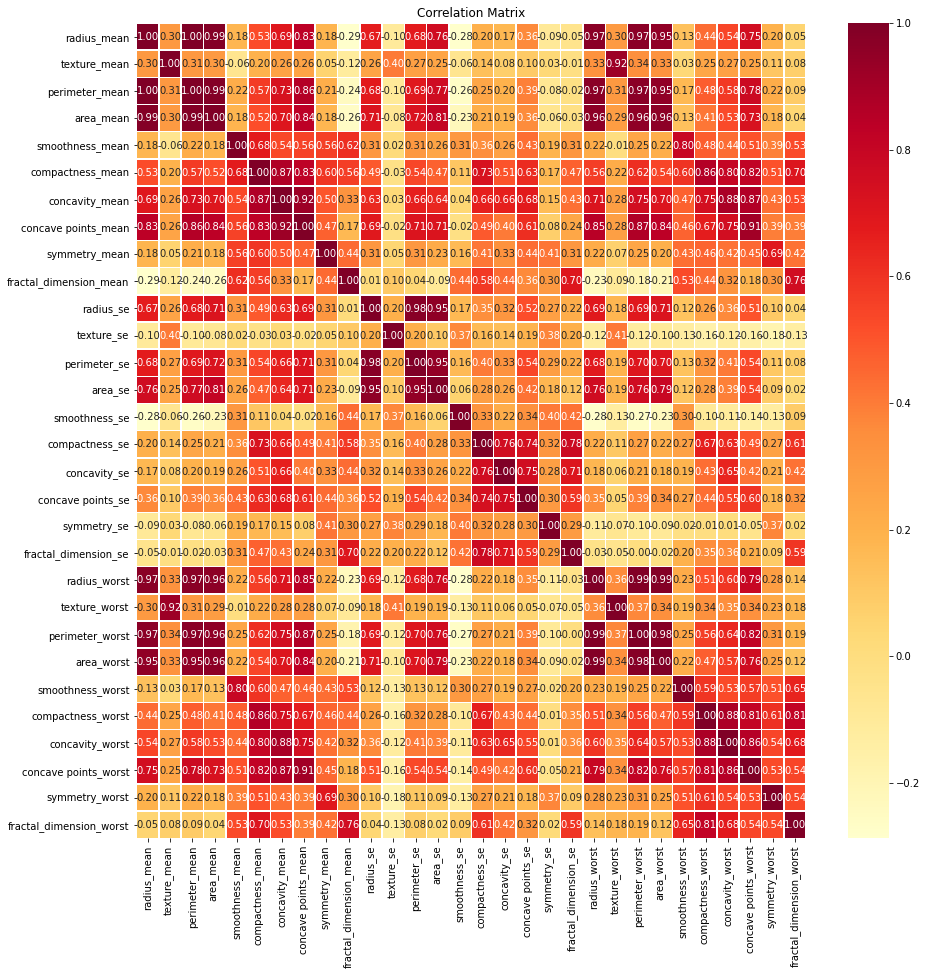

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train.corr(),annot=True,linewidths=0.5,fmt=".2f",cmap="YlOrRd")
plt.title("Correlation Matrix")

In [12]:
'''
Variance Threshold
The variance threshold is a simple baseline approach to feature selection. 
It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, 
i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more 
useful information, but note that we are not taking the relationship between feature variables or feature and target variables 
into account, which is one of the drawbacks of filter methods.

'''


from sklearn.feature_selection import VarianceThreshold
v_threshold = VarianceThreshold(threshold=0.5)
v_threshold.fit(x_train)
print(v_threshold.get_support())
print(x_train.columns)

[ True  True  True  True False False False False False False False False
  True  True False False False False False False  True  True  True  True
 False False False False False False]
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
# # VERY CONFUSED

# '''
# Fisher’s Score
# Fisher score is one of the most widely used supervised feature selection methods. 
# The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. 
# We can then select the variables as per the case.
# '''
# # pip install skfeature-chappers

# # %matplotlib inline
# from skfeature.function.similarity_based import fisher_score

# ranks = fisher_score.fisher_score(x_train.values, y_train, mode='rank') #returns rank directly instead of fisher score. so no need for feature_ranking
# print(ranks)


# # ranks = fisher_score(x_train, labels)
# plt.figure(figsize=(20, 20))
# plt.xticks([i for i in range(31)])
# plt.grid(True)
# feat_importances = pd.Series(ranks, x_train.columns)
# feat_importances.plot(kind='barh')
# plt.show()



# # 19 ko threshold rakh ke top 10 aa rahe hain le

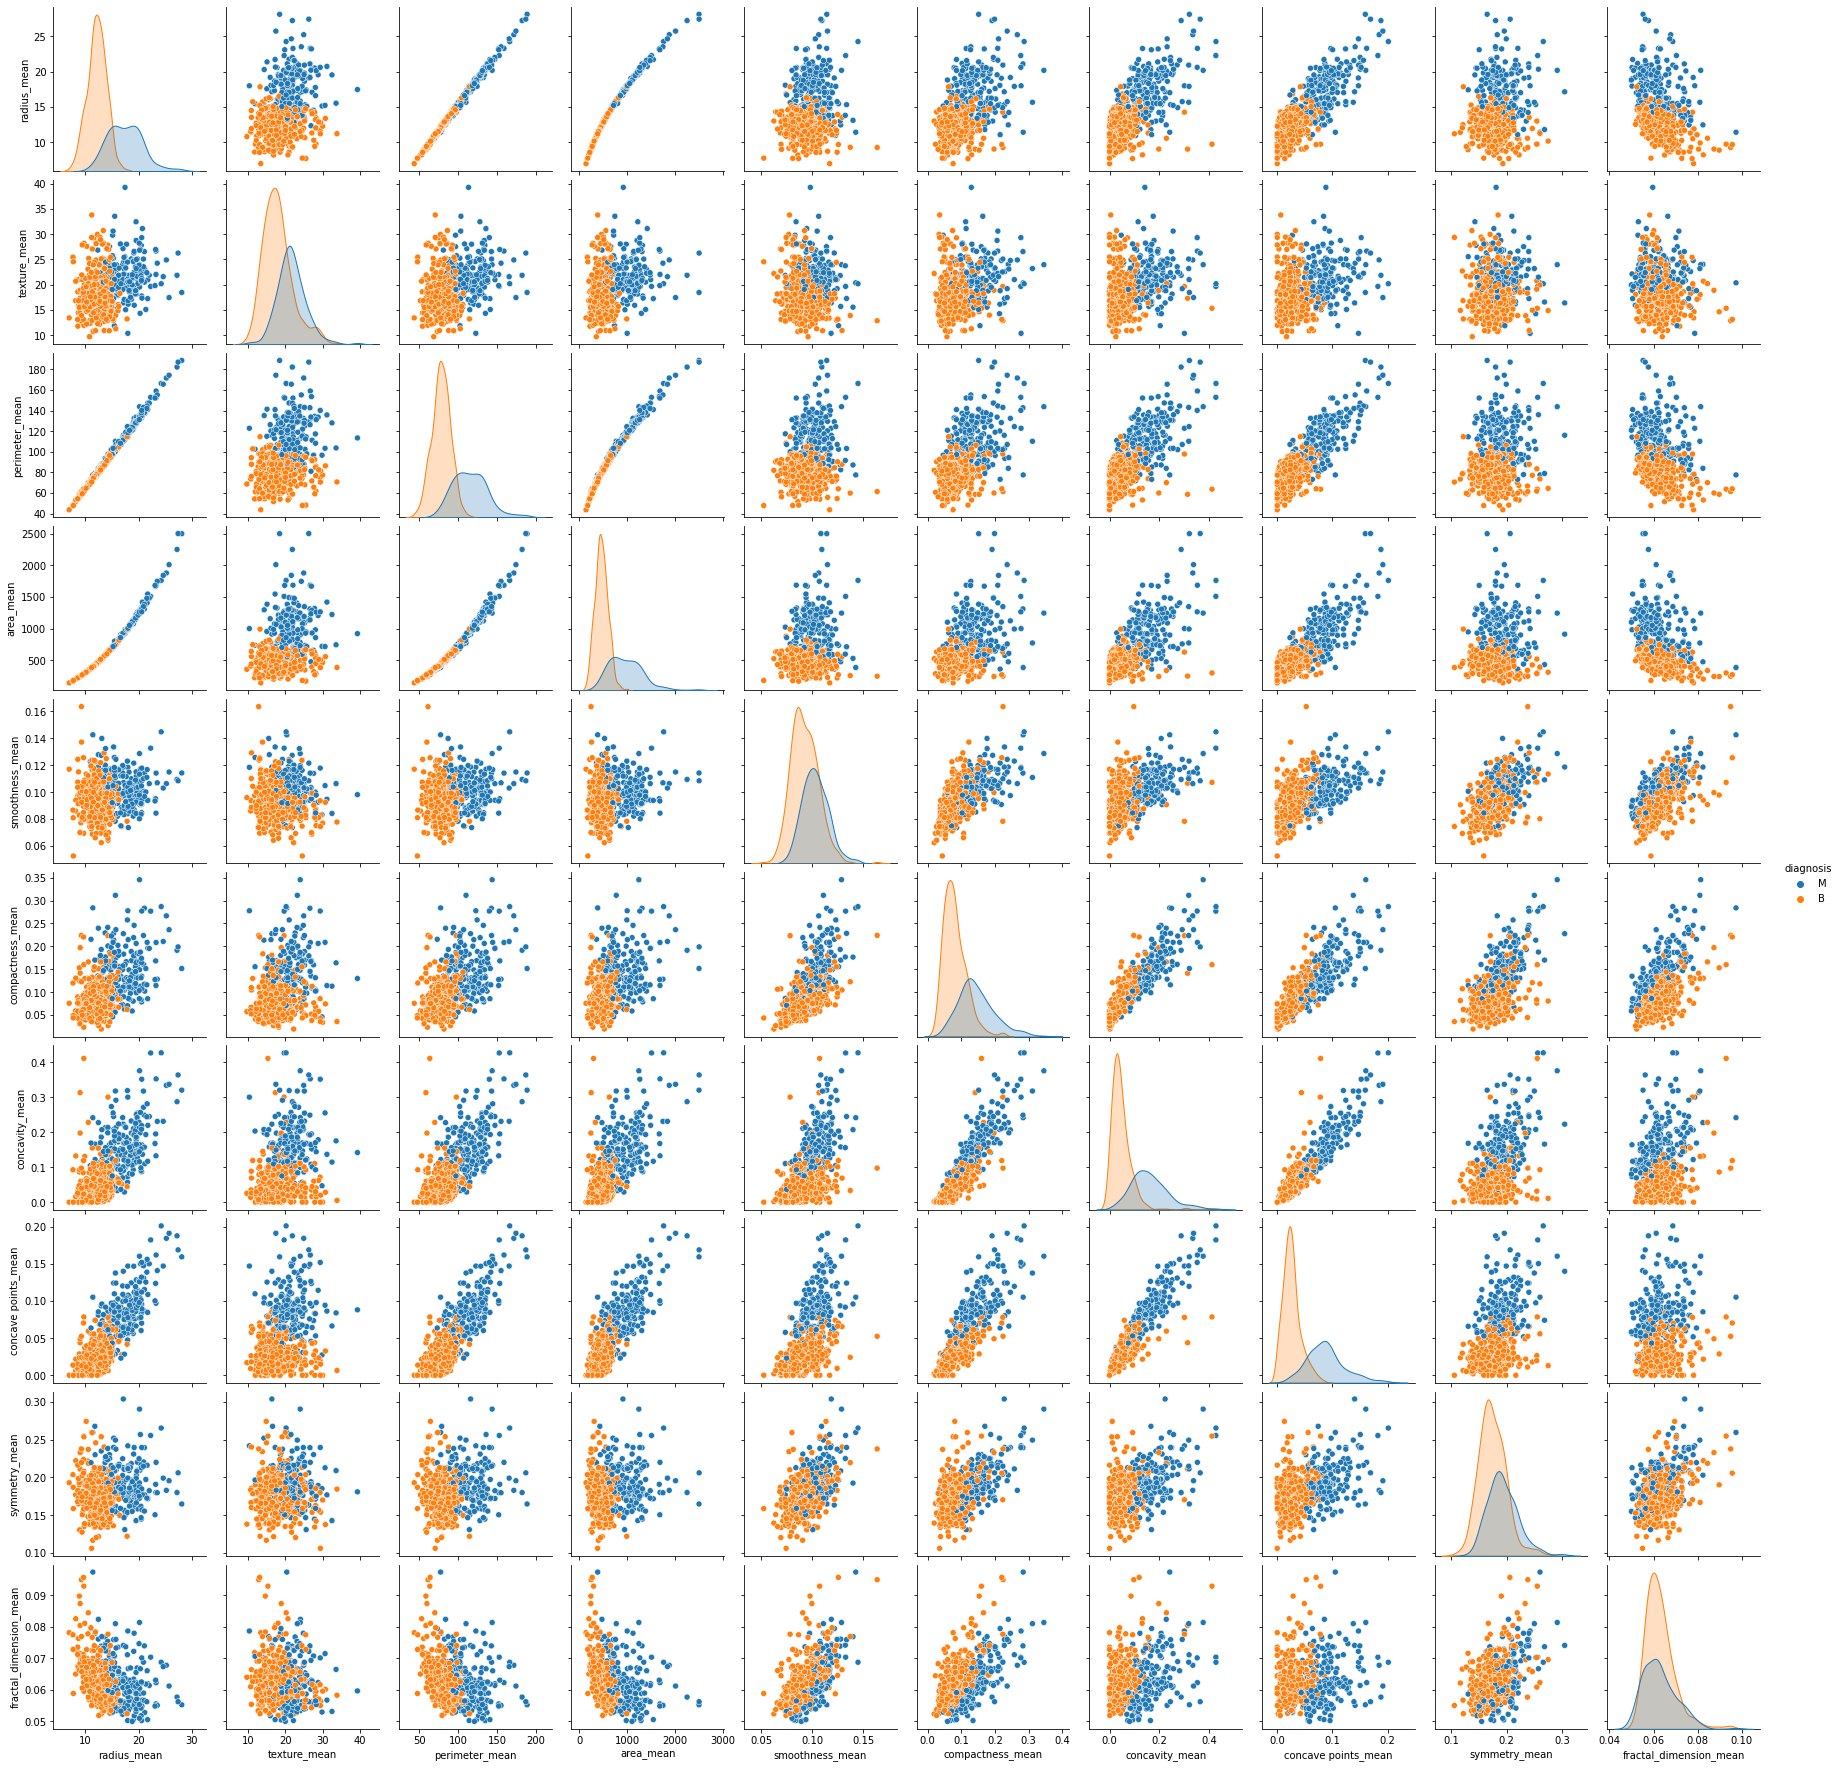

In [13]:
sns.pairplot(data, vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'], hue ='diagnosis')

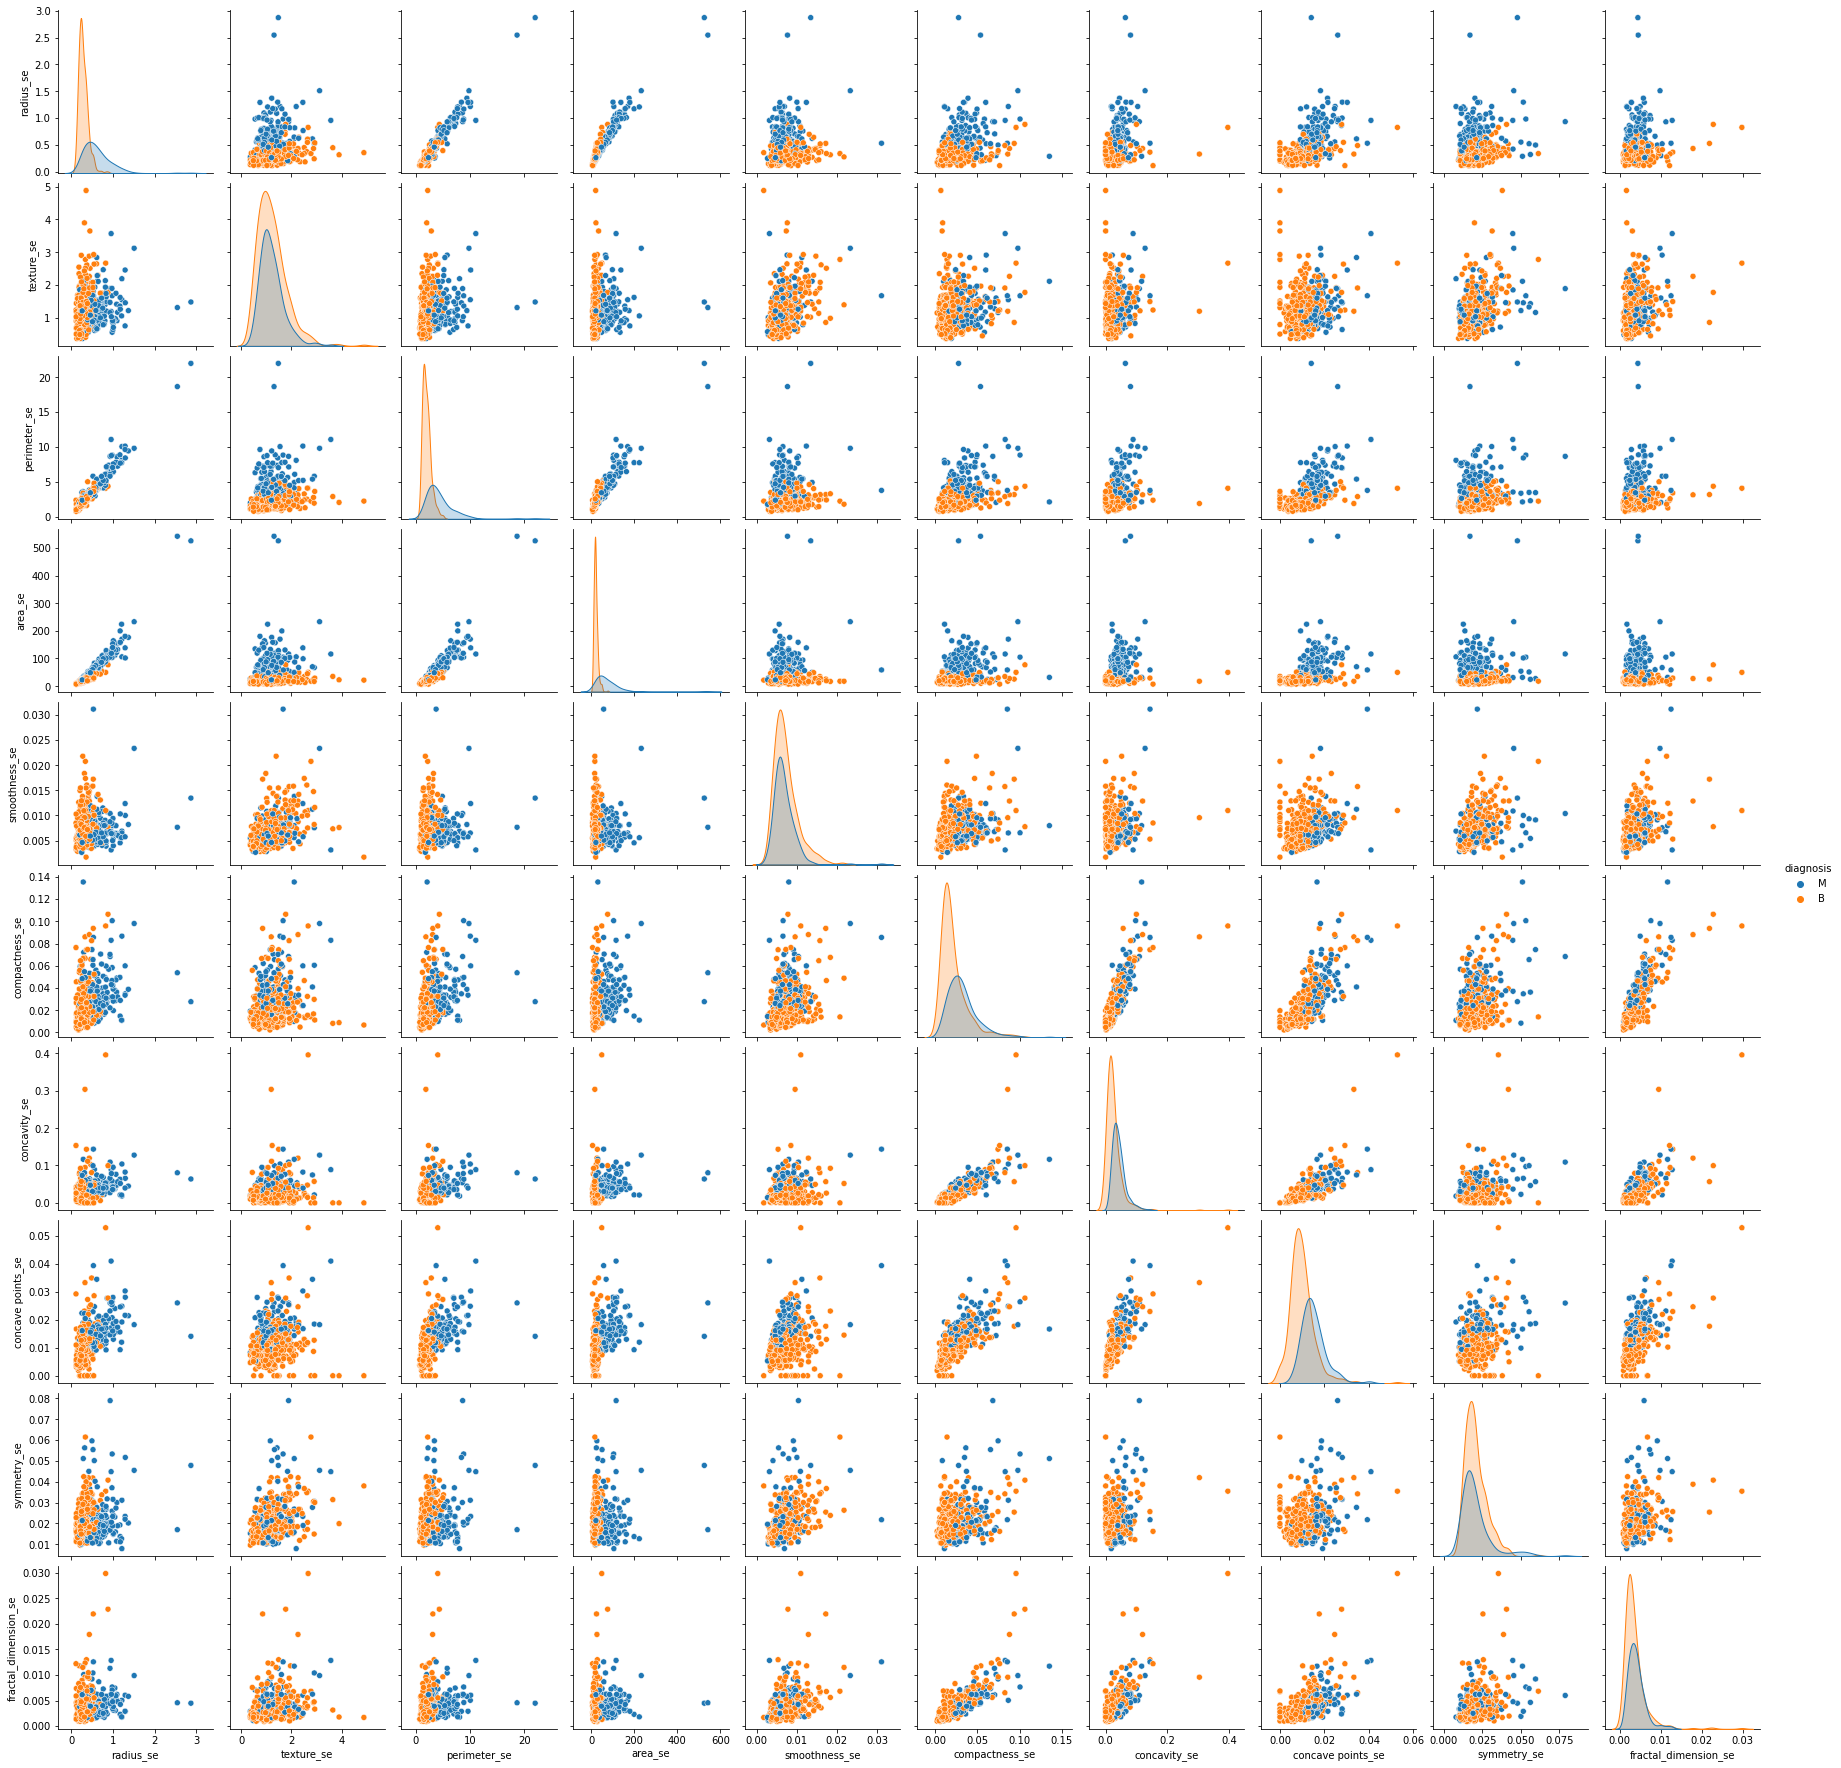

In [14]:
sns.pairplot(data, vars = ['radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se'], hue ='diagnosis')

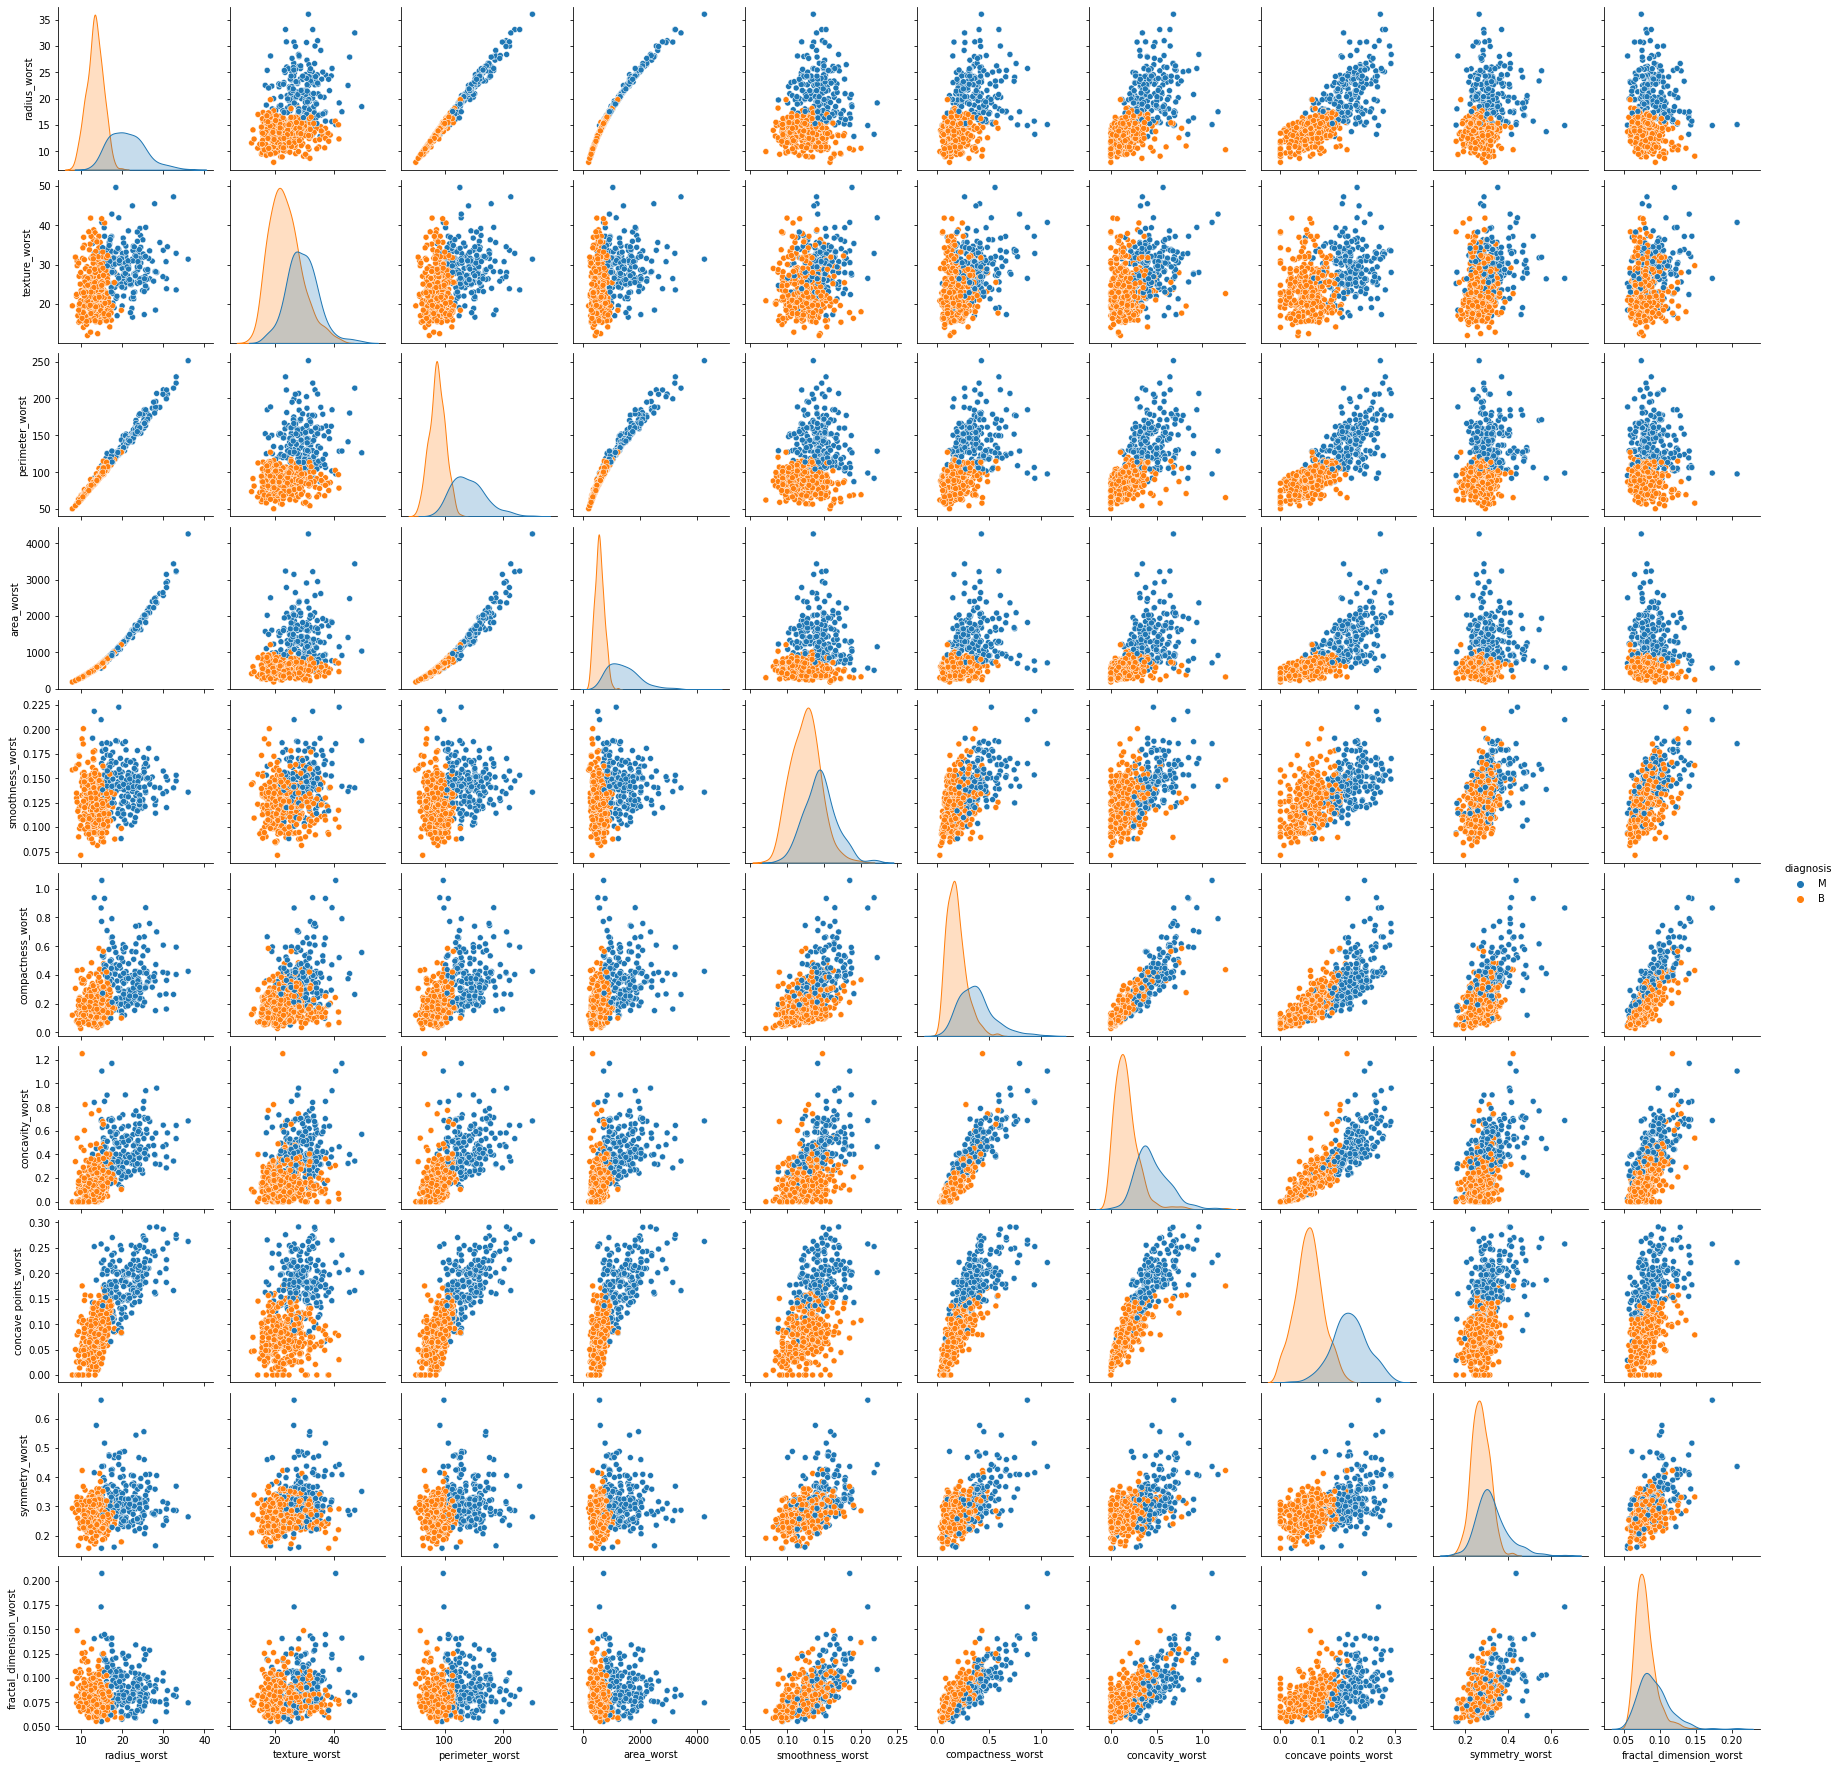

In [15]:
sns.pairplot(data, vars = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], hue ='diagnosis')

In [16]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(x_train)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# # iska dekh lenge
# import plotly.graph_objects as go
# import plotly.offline as pyo

# categories = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
#        'smoothness_mean', 'compactness_mean', 'concavity_mean',
#        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# categories = [*categories, categories[0]]

# malignant = [(np.log(np.array(data.loc[data.diagnosis =='M'].radius_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='M'].texture_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='M'].perimeter_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='M'].area_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='M'].smoothness_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='M'].compactness_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='M'].concavity_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='M']['concave points_mean']))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='M'].symmetry_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='M'].fractal_dimension_mean))).mean()]


# print(malignant)
# benign = [(np.log(np.array(data.loc[data.diagnosis =='B'].radius_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='B'].texture_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='B'].perimeter_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='B'].area_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='B'].smoothness_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='B'].compactness_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='B'].concavity_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='B']['concave points_mean']))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='B'].symmetry_mean))).mean(),
#              (np.log(np.array(data.loc[data.diagnosis =='B'].fractal_dimension_mean))).mean()]
# benign = [*benign, benign[0]]
# malignant = [*malignant, malignant[0]]
# print(benign)
# print(malignant)

# fig = go.Figure(
#     data=[
#         go.Scatterpolar(r=benign, theta=categories, name='Benign'),
#         go.Scatterpolar(r=malignant, theta=categories, name='Malignant'),
#     ],
#     layout=go.Layout(
#         title=go.layout.Title(text='X_train data '),
#         polar={'radialaxis': {'visible': True}},
#         showlegend=True
#     )
# )

# pyo.plot(fig)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

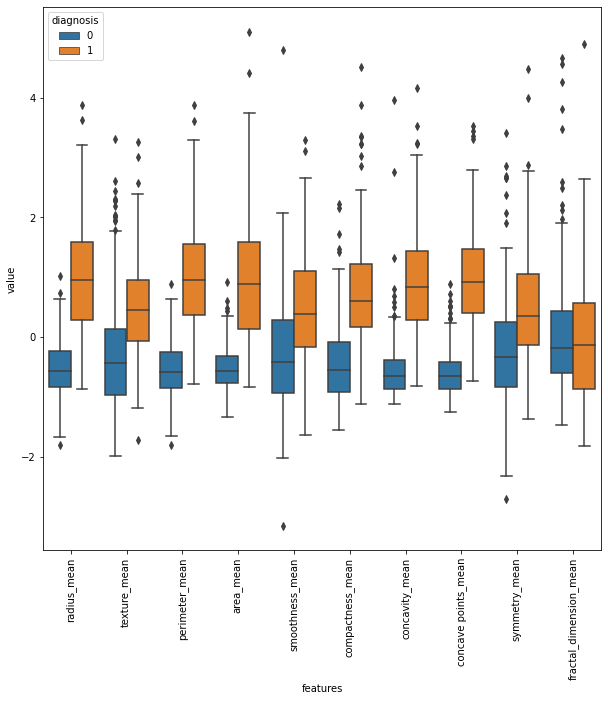

In [17]:
data = x_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_train, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

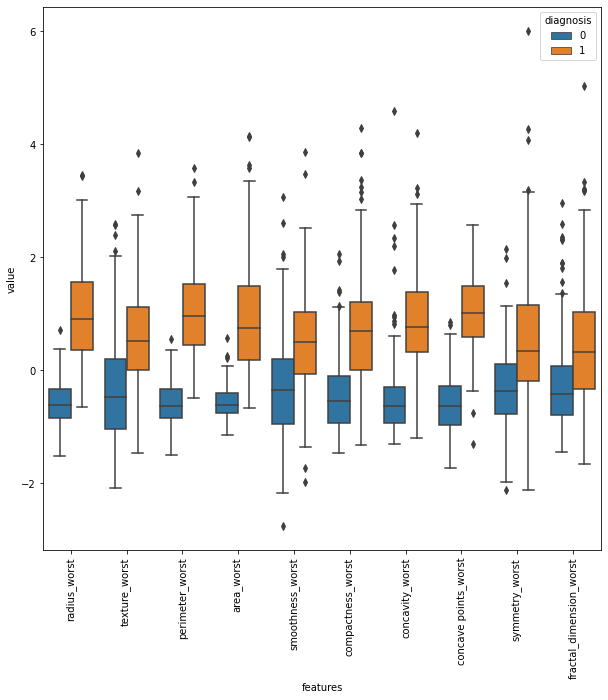

In [18]:
data = x_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_train, data_n_2.iloc[:,-10:]], axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

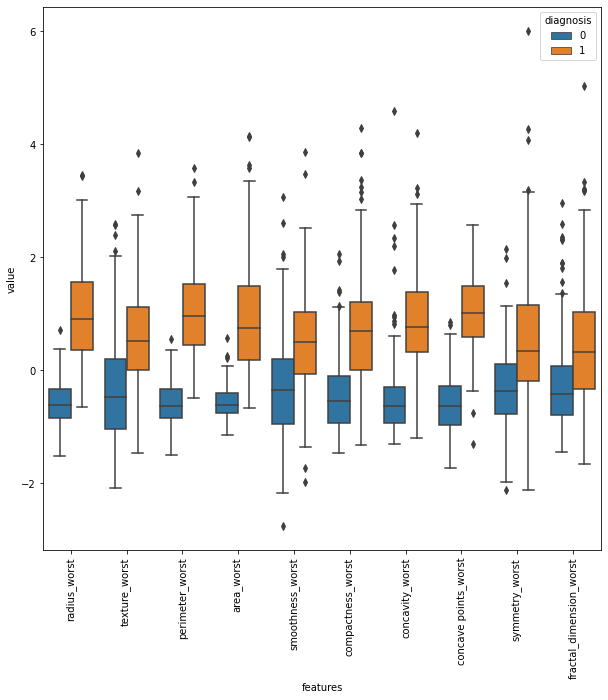

In [19]:
data = x_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_train, data_n_2.iloc[:,-10:]], axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)